In [16]:
pip install wordcloud

In [41]:
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

In [42]:
# NLTK에서 불용어 목록 다운로드
nltk.download('stopwords')

def get_word_frequencies(texts, stop_words):
    words = []
    for text in texts:
        # 모든 단어를 소문자로 변환하고, 단어만 추출
        words.extend(re.findall(r'\b\w+\b', text.lower()))
    
    # 불용어를 제외한 단어만 남기기
    filtered_words = [word for word in words if word not in stop_words]
    
    # 단어 빈도 계산
    word_counts = Counter(filtered_words)
    
    # 빈도수 순으로 정렬
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_word_counts

# 영어 불용어 목록 가져오기
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\나은수\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df = pd.read_csv('amz_TV_전처리.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(3)

,title,text,transformed_date,star,product_num,hp_data
0,Picture Quality and Sound effect,I had bought so many tv of LG from showroom......,"Aug, 2024",3,Dark Iron Gray,LG 80 cm HD Ready Smart LED TV 32LM563BPTC
1,It's an overpriced tv,The 14000 for the tv and 1000 extra for magic ...,"Aug, 2024",3,Dark Iron Gray,LG 80 cm HD Ready Smart LED TV 32LM563BPTC
2,Sound Quality not too good,"Good Apps, Color not too good and Sound qualit...","Aug, 2024",3,Dark Iron Gray,LG 80 cm HD Ready Smart LED TV 32LM563BPTC


In [44]:
title_list = df['text']

In [45]:
title_list

0      I had bought so many tv of LG from showroom......
1      The 14000 for the tv and 1000 extra for magic ...
2      Good Apps, Color not too good and Sound qualit...
3      Exchange offer does not work. The person in ph...
4      It old model tv\nWorking normaly\nNothing special
                             ...                        
960    This is very good TV I bought 5 TVs after sell...
961    This TV is Amazing I bought this TV by Selling...
962    The nano led panels of LG have extremely short...
963    It's too cheap...pl triple it's price so that ...
964    Instead of this model, buy LG 564A at Rs 21000...
Name: text, Length: 965, dtype: object

In [46]:
# 모든 값을 문자열로 변환하여 처리
df['text'] = df['text'].astype(str)

In [47]:
# 단어 빈도 계산 함수
def get_word_frequencies(text_list, stop_words):
    word_count = Counter()
    for text in text_list:
        # 모든 문자를 소문자로 변환하고, 특수문자 및 숫자를 제거
        words = re.findall(r'\b\w+\b', text.lower())
        # Stop words를 제거
        filtered_words = [word for word in words if word not in stop_words]
        word_count.update(filtered_words)
    return word_count.most_common()

In [48]:
stop_words.update(['lg', 'tv'])

In [49]:
word_frequencies = get_word_frequencies(df['text'], stop_words)

# 결과 출력
for word, freq in word_frequencies:
    print(f"{word}: {freq}")

good: 414
quality: 355
product: 259
amazon: 251
sound: 229
service: 228
installation: 206
remote: 204
even: 199
panel: 190
customer: 168
picture: 161
one: 148
display: 134
also: 133
like: 126
3: 117
5: 116
time: 115
1: 114
10: 113
brand: 112
return: 112
technician: 111
experience: 111
worst: 107
days: 105
2: 104
better: 103
video: 103
buy: 101
care: 101
issue: 99
get: 96
slow: 95
got: 95
screen: 94
working: 87
use: 81
play: 79
os: 77
much: 77
4: 76
2023: 75
apps: 74
delivery: 74
bad: 73
item: 73
money: 72
person: 72
buying: 72
price: 71
please: 67
great: 67
support: 65
within: 65
times: 65
pick: 65
voice: 64
warranty: 63
delivered: 62
webos: 60
hai: 60
lot: 59
call: 59
defective: 59
called: 58
replacement: 58
could: 57
many: 56
purchased: 56
take: 56
wall: 56
exchange: 55
said: 55
come: 55
app: 55
web: 54
contact: 54
purchase: 52
back: 52
agent: 52
response: 52
really: 51
never: 51
provided: 51
still: 50
model: 49
consider: 49
audio: 48
however: 48
mode: 48
magic: 47
ok: 47
bought: 46


### TV 워드클라우드

In [50]:
# 워드클라우드 import
from wordcloud import WordCloud
# 데이터를 시각화 해주는 라이브러리
import matplotlib.pyplot as plt

In [51]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'spring',
                      random_state = 1).generate(str(word_frequencies))

<function matplotlib.pyplot.show(close=None, block=None)>

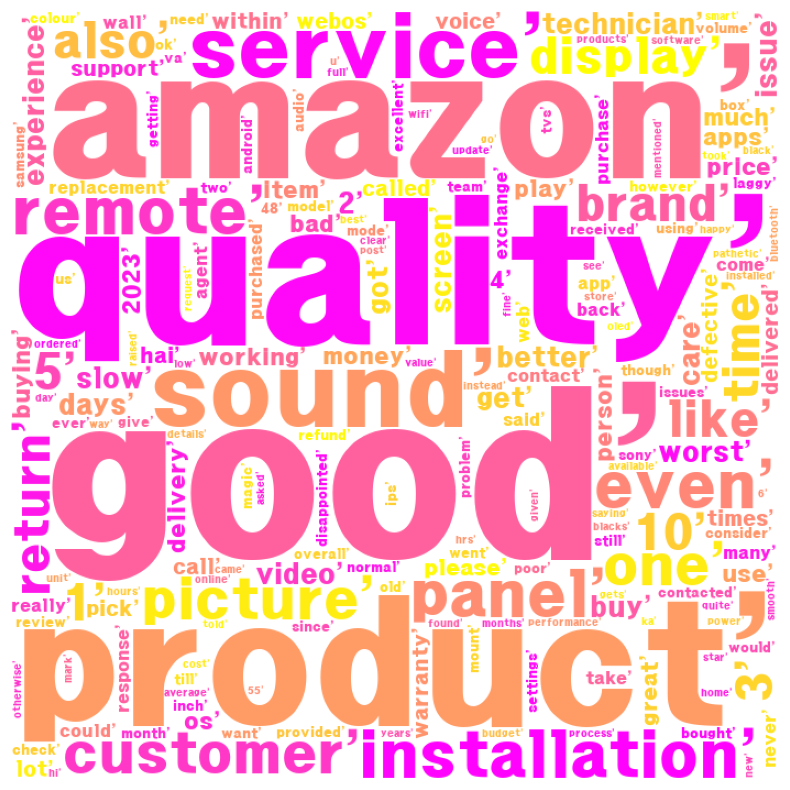

In [52]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
# plt.title("quora - india investments community question", size = 13)
plt.show

In [53]:
# star가 1-2인 데이터 필터링
low_ratings_df = df[df['star'].between(1, 2)]

# star가 4-5인 데이터 필터링
high_ratings_df = df[df['star'].between(4, 5)]

#### Low rating 워드클라우드

product: 217
quality: 212
service: 191
amazon: 167
customer: 160
even: 157
good: 145
installation: 116
return: 112
10: 107
sound: 103
also: 101
panel: 100
picture: 97
one: 96
care: 95
buy: 94
brand: 94
worst: 92
technician: 92
experience: 87
get: 85
time: 84
days: 81
display: 81
2023: 75
issue: 73
5: 72
3: 69
screen: 67
like: 66
working: 66
video: 65
pick: 65
1: 64
remote: 63
warranty: 61
hai: 60
2: 59
defective: 59
got: 59
delivery: 58
item: 58
buying: 57
bad: 57
better: 57
replacement: 55
delivered: 53
come: 52
slow: 52
back: 51
app: 48
please: 47
call: 47
4: 46
purchase: 46
agent: 46
take: 46
never: 45
refund: 45
much: 44
would: 43
many: 43
money: 42
play: 41
till: 41
within: 41
times: 41
purchased: 40
lot: 40
called: 40
response: 40
said: 40
could: 39
ever: 39
really: 39
use: 38
month: 37
poor: 37
great: 37
settings: 36
ka: 36
price: 35
issues: 35
request: 35
products: 34
review: 34
os: 33
exchange: 33
installed: 33
disappointed: 33
available: 33
u: 33
since: 33
however: 33
contact

<function matplotlib.pyplot.show(close=None, block=None)>

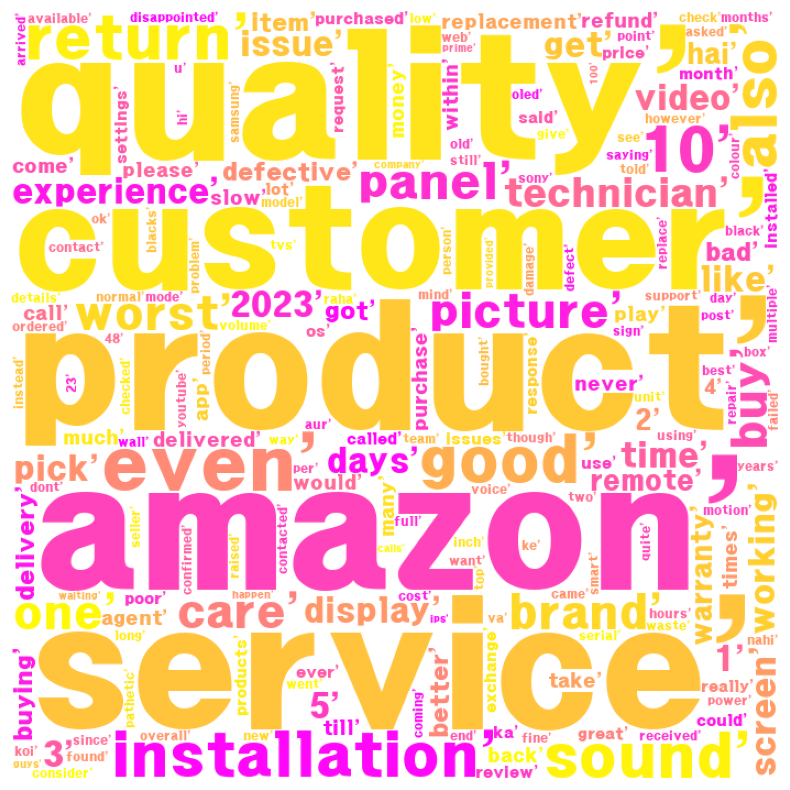

In [54]:
word_frequencies = get_word_frequencies(low_ratings_df['text'], stop_words)

# 결과 출력
for word, freq in word_frequencies:
    print(f"{word}: {freq}")

wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'spring',
                      random_state = 1).generate(str(word_frequencies))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

### WashingMachine 워드클라우드

In [55]:
df = pd.read_csv('amz_wash_전처리.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(3)

title_list = df['text']

# 모든 값을 문자열로 변환하여 처리
df['text'] = df['text'].astype(str)

In [56]:
stop_words.update(['lg', 'washing','machine'])

product: 328
service: 191
amazon: 167
good: 154
one: 105
also: 103
wash: 101
installation: 98
time: 97
buy: 95
clothes: 89
customer: 88
water: 84
2: 79
noise: 75
like: 74
quality: 73
days: 70
model: 66
working: 63
delivery: 60
even: 59
load: 57
drum: 57
received: 56
much: 55
1: 54
3: 54
technician: 52
exchange: 51
got: 51
small: 49
problem: 47
old: 47
kg: 47
bad: 46
issue: 46
return: 46
spin: 45
care: 44
5: 44
replacement: 44
worst: 44
use: 43
day: 42
video: 41
properly: 41
new: 41
better: 40
front: 40
brand: 39
get: 39
times: 39
need: 38
came: 37
go: 37
warranty: 36
mentioned: 36
disappointed: 36
size: 35
door: 35
price: 35
damaged: 35
products: 35
used: 34
motor: 34
rat: 34
since: 34
bought: 34
delivered: 34
please: 33
র: 33
6: 32
years: 32
takes: 32
poor: 32
item: 32
person: 31
said: 31
play: 31
money: 31
dryer: 31
back: 30
first: 30
see: 29
come: 29
lot: 29
support: 29
purchase: 29
replace: 29
7: 28
machines: 28
using: 28
year: 28
purchased: 27
cycle: 27
us: 27
top: 27
many: 27
mon

<function matplotlib.pyplot.show(close=None, block=None)>

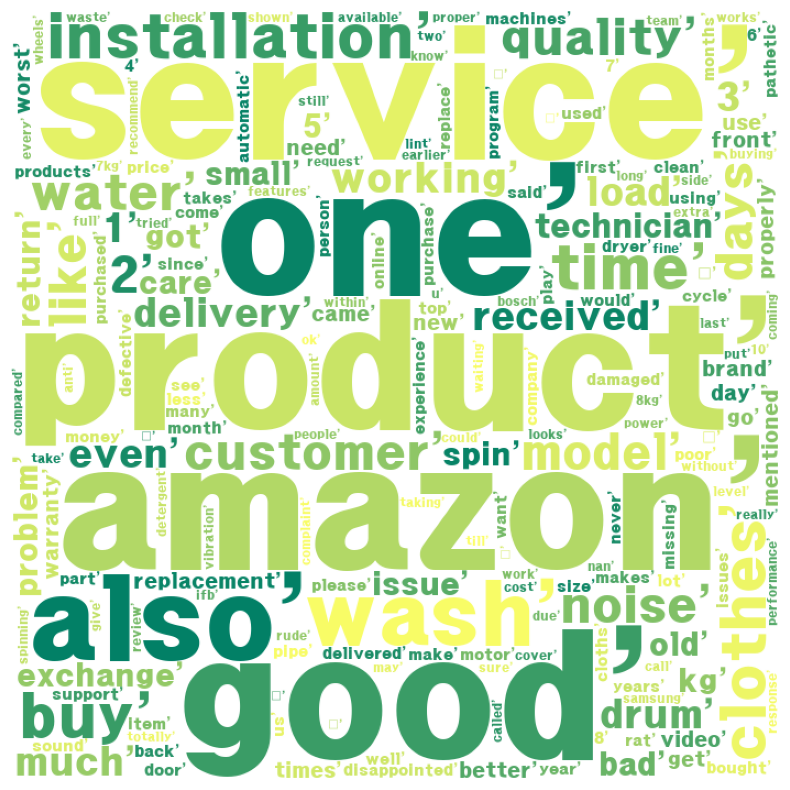

In [57]:
word_frequencies = get_word_frequencies(df['text'], stop_words)

# 결과 출력
for word, freq in word_frequencies:
    print(f"{word}: {freq}")

wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'summer',
                      random_state = 1).generate(str(word_frequencies))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

### Refrigerator 워드클라우드

In [58]:
df = pd.read_csv('amz_refri_전처리.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(3)

title_list = df['text']

# 모든 값을 문자열로 변환하여 처리
df['text'] = df['text'].astype(str)

In [59]:
stop_words.update(['lg', 'fridge'])

product: 418
refrigerator: 266
service: 231
amazon: 183
good: 183
working: 159
cooling: 139
buy: 137
days: 125
door: 120
one: 115
customer: 91
freezer: 90
3: 89
delivery: 88
issue: 88
compressor: 87
time: 86
even: 85
also: 84
like: 80
installation: 78
problem: 75
months: 72
money: 71
2: 71
side: 69
bad: 69
year: 68
damaged: 66
stopped: 65
quality: 63
received: 63
within: 62
worst: 62
get: 61
please: 59
replacement: 58
ice: 58
products: 58
call: 57
purchase: 56
got: 54
1: 54
years: 53
new: 53
technician: 53
delivered: 50
bought: 50
warranty: 50
tray: 49
support: 49
क: 49
never: 49
model: 48
return: 48
poor: 47
5: 45
said: 45
noise: 45
10: 45
र: 45
month: 44
purchased: 43
small: 43
back: 43
still: 43
defective: 42
care: 41
item: 40
experience: 40
water: 40
came: 40
damage: 40
video: 40
go: 39
team: 38
issues: 38
times: 38
disappointed: 38
ह: 38
brand: 37
told: 37
would: 37
much: 37
price: 37
day: 37
4: 37
replace: 35
complaint: 35
play: 35
dent: 34
every: 34
called: 34
properly: 34
getti

<function matplotlib.pyplot.show(close=None, block=None)>

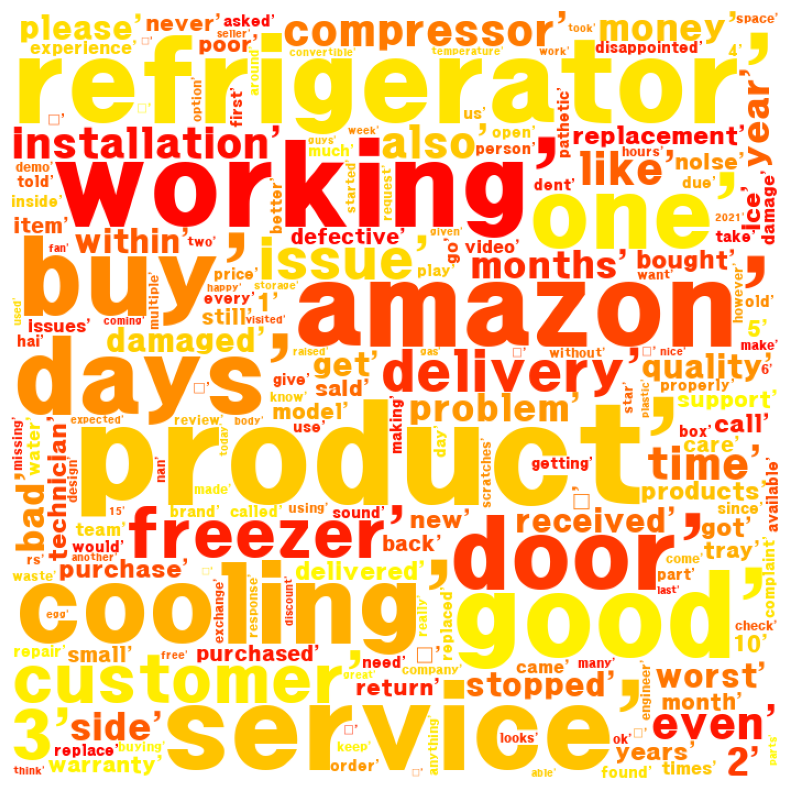

In [60]:
word_frequencies = get_word_frequencies(df['text'], stop_words)

# 결과 출력
for word, freq in word_frequencies:
    print(f"{word}: {freq}")

wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'autumn',
                      random_state = 1).generate(str(word_frequencies))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

### aircondition 워드클라우드

In [61]:
df = pd.read_csv('amz_air_전처리.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(3)

title_list = df['text']

# 모든 값을 문자열로 변환하여 처리
df['text'] = df['text'].astype(str)

In [62]:
stop_words.update(['lg', 'ac'])

installation: 403
service: 363
product: 290
cooling: 267
amazon: 161
customer: 145
even: 142
one: 136
good: 133
room: 130
unit: 117
also: 115
1: 115
buy: 109
days: 108
technician: 105
time: 101
5: 101
2: 93
bought: 92
care: 87
money: 85
brand: 83
experience: 79
3: 78
get: 77
gas: 75
worst: 74
copper: 73
months: 72
pipe: 70
issue: 69
installed: 67
call: 67
bad: 66
cool: 66
came: 65
said: 62
like: 62
air: 62
please: 61
working: 61
got: 55
year: 55
using: 54
much: 54
10: 53
products: 53
warranty: 53
go: 53
star: 51
model: 51
still: 50
complaint: 49
done: 49
extra: 48
ton: 48
use: 48
4: 48
poor: 47
delivery: 47
work: 47
better: 47
problem: 47
company: 44
center: 43
need: 43
mode: 43
water: 43
request: 43
properly: 42
well: 41
support: 41
never: 41
first: 40
team: 40
leakage: 40
day: 40
pay: 39
may: 39
last: 39
month: 39
would: 38
engineer: 38
quality: 37
new: 37
since: 37
called: 37
outdoor: 37
rs: 37
cost: 37
purchased: 37
performance: 37
inverter: 37
two: 37
high: 37
temperature: 36
wast

<function matplotlib.pyplot.show(close=None, block=None)>

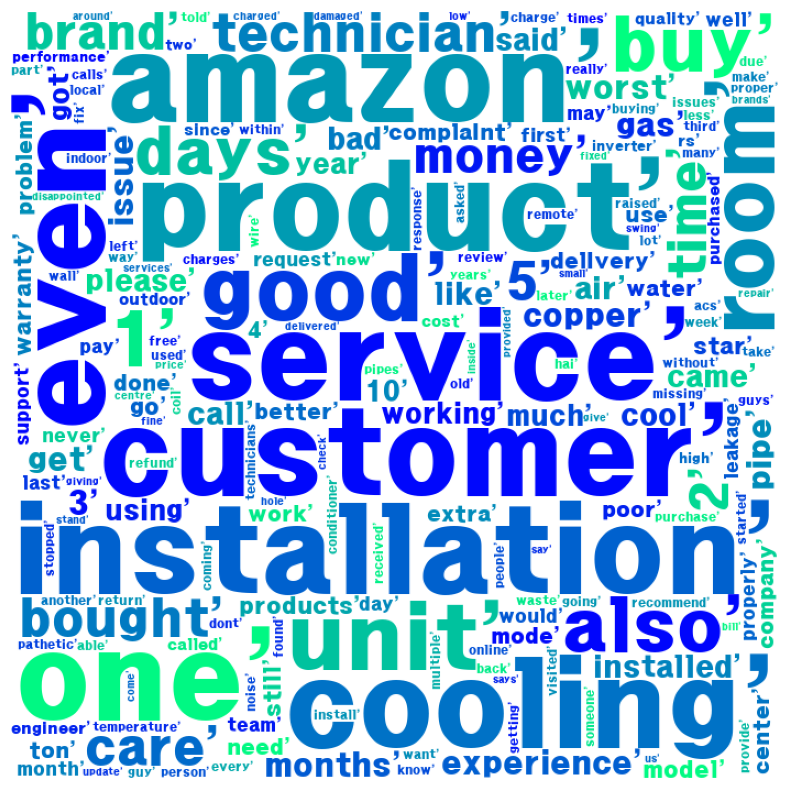

In [63]:
word_frequencies = get_word_frequencies(df['text'], stop_words)

# 결과 출력
for word, freq in word_frequencies:
    print(f"{word}: {freq}")

wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'winter',
                      random_state = 1).generate(str(word_frequencies))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show